# Математическая статистика
## Практическое задание 2

В данном задании рассматриваются различные свойства оценок, методы получения оценок, способы сравнения оценок.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 3 балла
* Задача 3 - 3 балла
* Задача 4 - 2 балла
* Задача 5 - 2 балла
* Задача 6 - 3 балла
* Задача 7а - 3 балла
* Задача 7b<font size="5" color="red">\*</font> - 5 баллов
* Задача 8 - 4 балла
* Задача 9<font size="5" color="red">\*</font> - 4 балла
* Задача 10<font size="5" color="red">\*</font> - 5 баллов


При выполнении задания рекомендуется пользоваться библиотекой `scipy.stats`. Подробное описание есть в наших инструкциях.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from statsmodels.nonparametric.kde import KDEUnivariate
import scipy

%matplotlib inline

**Задача 1.** В этой задаче нужно визуализировать свойство несмещенности.

Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что в качестве оценки параметра $\theta$ можно использовать следующие оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}$ и $2\overline{X}$

Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра.

Сгенерируйте 500 выборок $X_1^j, ..., X_n^j$ из распределения $U[0, 1]$, по каждой из них посчитайте оценку $\widehat{\theta}_j$, получив тем самым 500 независимых оценок параметра. Нанесите их на график с одинаковой *у*-координатой. Отметьте специальным символом среднее этих выборок (см. шаблон ниже). Выполните данную процедуру для $n \in \{10, 100, 500\}$.

Для нанесения точек на график используйте следующий шаблон. Для каждой оценки выставите разный *уровень*, чтобы реализации разных оценок не слипались. В качестве *метки* используйте latex-код этой оценки, который можно взять выше в условии этой задачи. Постарайтесь не размножать код, а сделать циклы по типам оценок и по размеру выборки. Естественно, все типы оценок должны быть на одном графике, но для разных $n$ должны быть разные графики.

In [2]:
def check_unbiased(distribution, estimators):
    number_samples = 500
    for number_elements_in_sample in [10, 100, 500]:
        plt.figure(figsize=(15, 3))
        
        # Для каждой оценки:
        samples = distribution.rvs(size=number_elements_in_sample * number_samples).reshape(number_samples, number_elements_in_sample)
        for i, (estimator, estimate_label, estimate_color) in enumerate(estimators):
            estimate = estimator(samples)
            plt.scatter(estimate, np.zeros_like(estimate) + i, alpha=0.1, s=100, color=estimate_color, label=estimate_label)
            plt.scatter(estimate.mean(), i, marker='*', s=200, color='w', edgecolors='black')

        # Для всего графика:
        plt.vlines(1, -0.5, len(estimators) - 0.5, color='r')
        plt.title('sample size = %d' % number_elements_in_sample)
        plt.yticks([])
        plt.legend()
        plt.show()

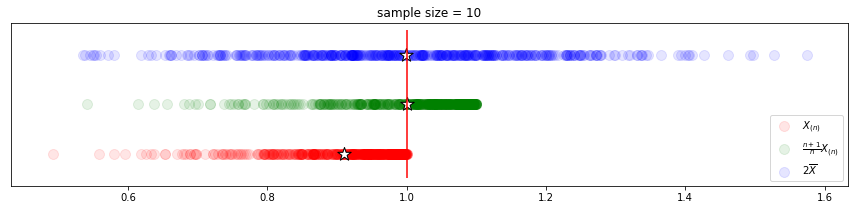

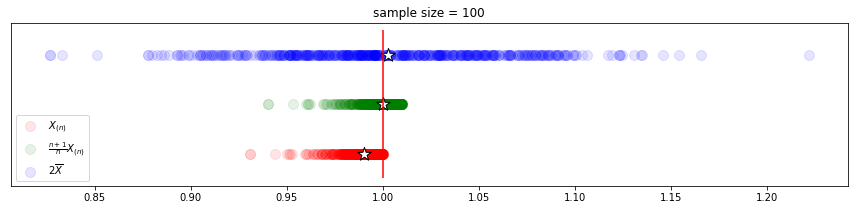

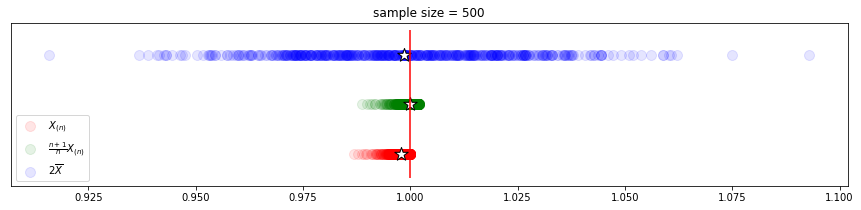

In [3]:
def uniform_estimator1(samples):
    return samples.max(axis=1)

def uniform_estimator2(samples):
    n = samples.shape[1]
    return samples.max(axis=1) * (n + 1) / n

def uniform_estimator3(samples):
    return samples.mean(axis=1) * 2

uniform_estimators = [(uniform_estimator1, '$X_{(n)}$', 'red'),
                      (uniform_estimator2, '$\\frac{n+1}{n}X_{(n)}$', 'green'),
                      (uniform_estimator3, '$2\overline{X}$', 'blue')]
check_unbiased(sps.uniform, uniform_estimators)

Пусть теперь $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$.

**Вопрос:** Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n}{n-1}S^2$

Для данной модели выполните те же действия, что и с предыдущей.

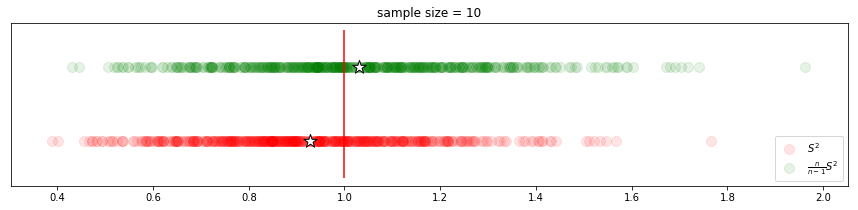

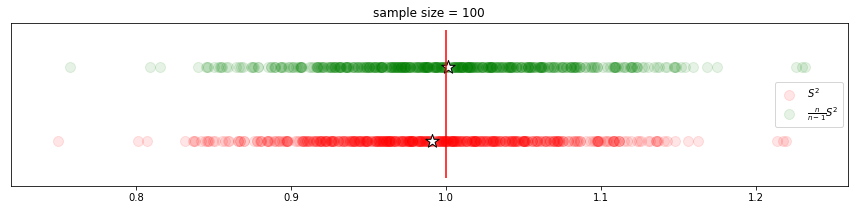

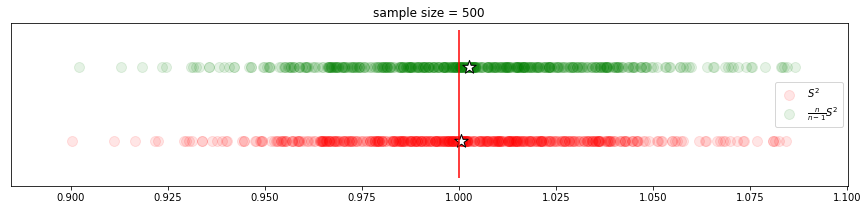

In [4]:
def norm_estimator1(samples):
    return samples.std(axis=1)

def norm_estimator2(samples):
    n = samples.shape[1]
    return samples.std(axis=1) * n / (n - 1)

norm_estimators = [(norm_estimator1, '$S^2$', 'red'),
                   (norm_estimator2, '$\\frac{n}{n-1}S^2$', 'green')]
check_unbiased(sps.norm, norm_estimators)

Сделайте вывод о том, что такое свойство несмещенности. Подтверждают ли сделанные эксперименты свойство несмещенности данных оценок? Поясните, почему в лабораторных по физике при оценке погрешности иногда используют $n-1$ в знаменателе, а не $n$.

**Вывод:** несмещённость --- это свойство оценки, означающее, что матожидание этой оценки равно значению оцениваемого параметра. Да, подтверждают, особенно это заметно при маленьких размерах выборок. Именно поэтому в лабораторных по физике для расчёта погрешности используют $n - 1$ в знаменателе --- чтобы сделать оценку несмещённой. Без $n - 1$ получится смещённая оценка $S^2$, а с $n - 1$ получится несмещённая оценка $\frac{n}{n-1}S^2$

**Задача 2.** В этой задаче нужно визуализировать свойство состоятельности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является состоятельной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценка параметра по первым $n$ наблюдениям $j$-й выборки. При написании кода может помочь вступительное задание.

Для каждого $j$ нанесите на один график зависимость $\widehat{\theta}_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Поскольку при малых $n$ значения оценок могут быть большими, ограничьте область графика по оси *y* с помощью функции `plt.ylim((min, max))`.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Известно, что $X_{(n)}$ является состоятельной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*, сгенерировав выборки из распределения $U[0, 1]$ и посчитав оценки $\widehat{\theta}_{jn} = \max\limits_{i=1...n}X_i^j$.

Сделайте вывод о том, что такое свойство состоятельности. Подтверждают ли сделанные эксперименты свойство состоятельности данных оценок? Как связаны результаты в пункте *a)* с законом больших чисел?

In [5]:
def check_consistent(distribution, estimator):
    plt.figure(figsize=(15, 5))
    
    number_samples = 200
    number_elements_in_sample = 300
    samples = distribution.rvs(size=number_elements_in_sample * number_samples).reshape(number_samples, number_elements_in_sample)
    estimates = estimator(samples)
    for estimate in estimates:
        plt.plot(np.arange(1, number_elements_in_sample + 1), estimate, color='red', alpha=0.2)
    plt.show()

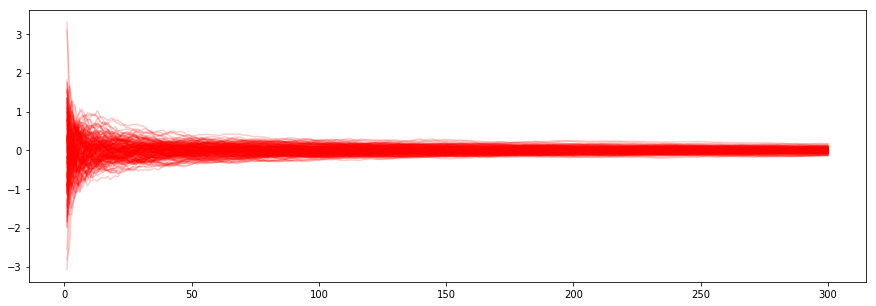

In [6]:
def norm_estimator(samples):
    n = samples.shape[1]
    return samples.cumsum(axis=1) / np.arange(1, n + 1)

check_consistent(sps.norm, norm_estimator)

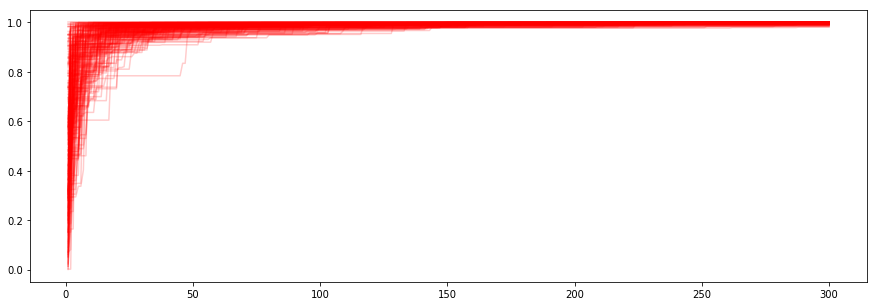

In [7]:
def uniform_estimator(samples):
    return np.maximum.accumulate(samples, axis=1)

check_consistent(sps.uniform, uniform_estimator)

**Вывод:** Состоятельность --- это свойство оценки, означающее, что оценка сходится по вероятности к оцениваемому параметру. Да, подтверждают: по графику видно, что чем больше число элементов в выборке, тем уже "красный луч графиков оценок". Закон больших чисел, применённый к пункту (а) говорит, что $\forall\delta>0\ \frac{S_n}{n^{1/2+\delta}} \xrightarrow{P} 0$. Состоятельность оценки в пункте (а) означает, что $\frac{S_n}{n} \xrightarrow{P} 0$. Видно, что состоятельность оценки в пункте (а) следует из закона больших чисел.

**Задача 3.** В этой задаче нужно визуализировать свойство асимптотической нормальности.

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(\theta, 1)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Вам нужно убедиться в этом, сгенерировав множество выборок и посчитав по каждой из них оценку параметра в зависимости от размера выборки.

Сгенерируйте 200 выборок $X_1^j, ..., X_{300}^j$ из распределения $\mathcal{N}(0, 1)$. По каждой из них посчитайте оценки $\widehat{\theta}_{jn} = \frac{1}{n}\sum\limits_{i=1}^n X_i^j$ для $1 \leqslant n \leqslant 300$, то есть оценку параметра по первым $n$ наблюдениям $j$-й выборки. Для этой оценки посчитайте статистику $T_{jn} = \sqrt{n} \left( \widehat{\theta}_{jn} - \theta \right)$, где $\theta = 0$.

Для каждого $j$ нанесите на один график зависимость $T_{jn}$ от $n$ с помощью `plt.plot`. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.2`. Сходятся ли значения $T_{jn}$ к какой-либо константе?

Для $n=300$ по выборке $T_{1,300}, ..., T_{200,300}$ постройте гистограмму и ядерную оценку плотности. Хорошо ли они приближают плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Pois(\theta)$. Известно, что $\overline{X}$ является асимптотически нормальной оценкой параметра $\theta$. Выполните исследование, аналогичное пункту *a)*.

Сделайте вывод о том, что такое свойство асимптотической нормальности. Подтверждают ли сделанные эксперименты свойство асимптотической нормальности данных оценок? Как связаны результаты с центральной предельной теоремой?

In [8]:
def draw_hist_and_kde(sample, grid, true_pdf):
    # гистограмма
    plt.hist(sample, 20, range=(grid.min(), grid.max()), normed=True, label='histogram')

    # ядерная оценка плотности
    kernel_density = KDEUnivariate(sample)
    kernel_density.fit()
    plt.plot(grid, kernel_density.evaluate(grid), color='green', linewidth=2, label='kde')

    # истинная плотность
    plt.plot(grid, true_pdf(grid), color='red', linewidth=2, alpha=0.3, label='true pdf')

    plt.legend()
    plt.show()


def check_asymptotic_normality(distribution, estimator, true_distribution_of_T_j_n, grid_min, grid_max, distribution_name):
    number_samples = 200
    number_elements_in_sample = 300
    samples = distribution.rvs(size=number_elements_in_sample * number_samples).reshape(number_samples, number_elements_in_sample)
    estimates = estimator(samples)

    plt.figure(figsize=(15, 5))
    plt.title('plots of $T_{{jn}}$ for {} distribution'.format(distribution_name))
    for estimate in estimates:
        plt.plot(np.arange(1, number_elements_in_sample + 1), estimate, color='red', alpha=0.2)
    plt.show()

    plt.title('plots of $T_{{j, {}}}$ for {} distribution'.format(number_elements_in_sample, distribution_name))
    draw_hist_and_kde(estimates[:, -1], np.linspace(grid_min, grid_max, 500), true_distribution_of_T_j_n.pdf)

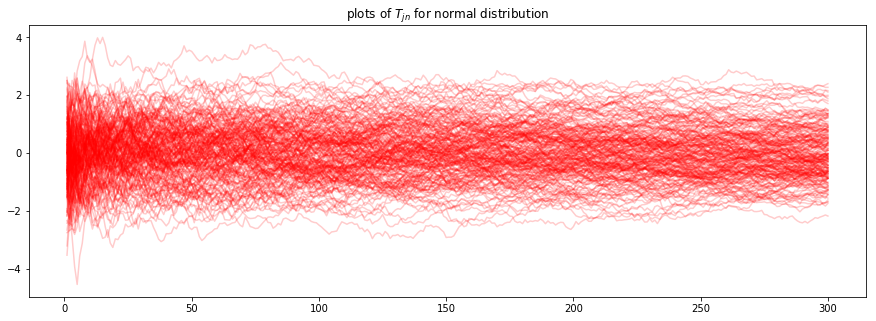

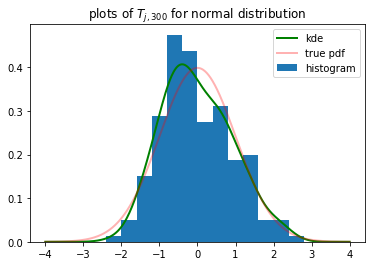

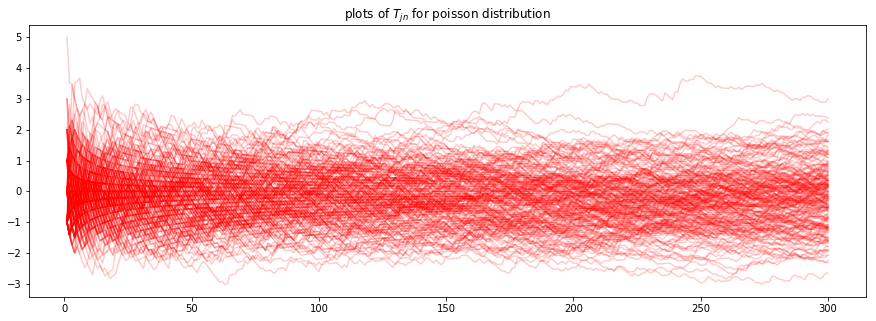

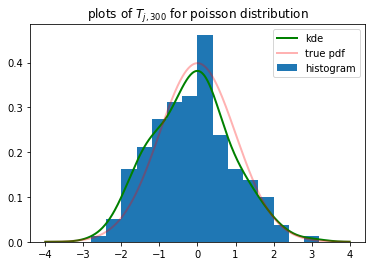

In [9]:
def create_estimator(distribution_mean):
    def estimator(samples):
        # принимает массив выборок
        # для каждой выборки считает n статистик: T_k = \sqrt{k} * (θ_k - θ),
        # где θ_k = (X_1 + ... + X_k) / k
        n = samples.shape[1]
        estimates = samples.cumsum(axis=1) / np.arange(1, n + 1)
        estimates = np.sqrt(np.arange(1, n + 1)) * (estimates - distribution_mean)
        return estimates

    return estimator

check_asymptotic_normality(sps.norm, create_estimator(0), sps.norm, -4, 4, 'normal')
check_asymptotic_normality(sps.poisson(1), create_estimator(1), sps.norm, -4, 4, 'poisson')

**Вывод:** Нет, значения $T_{jn}$ не сходятся к константе. Ассимптотическая нормальность --- это свойство оценки, означающее, что распределение этой оценки стремится к нормальному. Более точно, оценка $\theta^*_n$ ассимптотически нормальна, если 

$$\sqrt{n}(\theta^*_n - \theta) \xrightarrow{d_{\theta}} N(0, 1)$$
Распишем это выражение:
$$\sqrt{n}(\overline{X} - 0) \xrightarrow{d_{\theta}} N(0, 1)$$
$$\sqrt{n}(\frac{1}{n}S_n - 0) \xrightarrow{d_{\theta}} N(0, 1)$$
$$\frac{S_n - 0}{\sqrt{n}} \xrightarrow{d_{\theta}} N(0, 1)$$
$$\frac{S_n - ES_n}{\sqrt{n}} \xrightarrow{d_{\theta}} N(0, 1)$$
Получаем, что в нашем случае из центральной предельной теоремы следует ассимптотическая нормальность оценки. Это и подтверждается графиком с ядерной оценкой плотности.

**Задача 4.** Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Из домашнего задания известно, что $n\left(\theta - X_{(n)}\right) \stackrel{d_\theta}{\longrightarrow} Exp\left(1/\theta\right)$. Проведите исследование, аналогичное заданию 3 для $\theta=1$.

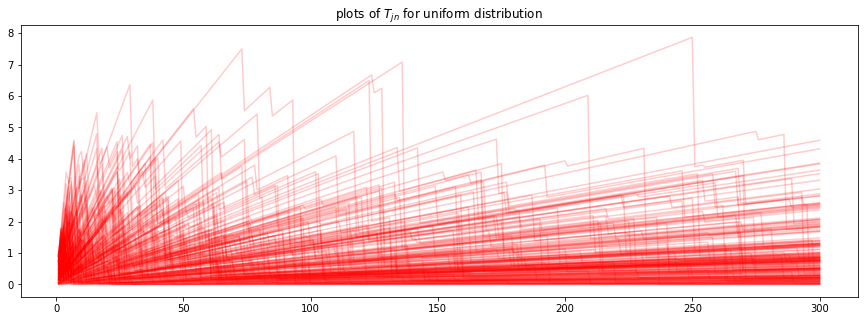

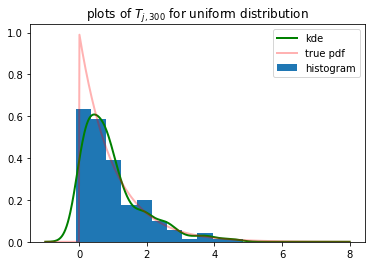

In [10]:
def estimator(samples):
    # принимает массив выборок
    # для каждой выборки считает n статистик: T_k = k * (θ - X_(k))
    n = samples.shape[1]
    return np.arange(1, n + 1) * (1 - np.maximum.accumulate(samples, axis=1))

check_asymptotic_normality(sps.uniform, estimator, sps.expon, -1, 8, 'uniform')

**Вывод:** как и в третьей задаче экспериментальные данные подтверждают теоритические результаты.

**Задача 5.** Дана параметрическая модель и несколько выборок из двух или трех наблюдений (для удобства они даются в виде python-кода). Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: [-1, 1], [-5, 5], [-1, 5]

*b).* Параметрическая модель $Exp(\theta)$, выборки: [1, 2], [0.1, 1], [1, 10]

*c).* Параметрическая модель $U[0, \theta]$, выборки: [0.2, 0.8], [0.5, 1], [0.5, 1.3]

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: [0, 1], [5, 5], [0, 5]

*e).* Параметрическая модель $Pois(\theta)$, выборки: [0, 1], [0, 10], [5, 10]

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ --- параметр сдвига, выборки: [-0.5, 0.5], [-2, 2], [-4, 0, 4]

Выполнить задание, не создавая много кода, поможет следующая функция.

In [11]:
def draw_likelihood(density_function, grid, samples, label):
    ''' density_function --- функция, считающая плотность (обычную или дискретную)
        grid --- сетка для построения графика
        samples --- три выборки
        label --- latex-код параметрической модели
    '''
    
    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        # значение функции правдоподобия
        likelihood = density_function(sample).prod(axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода

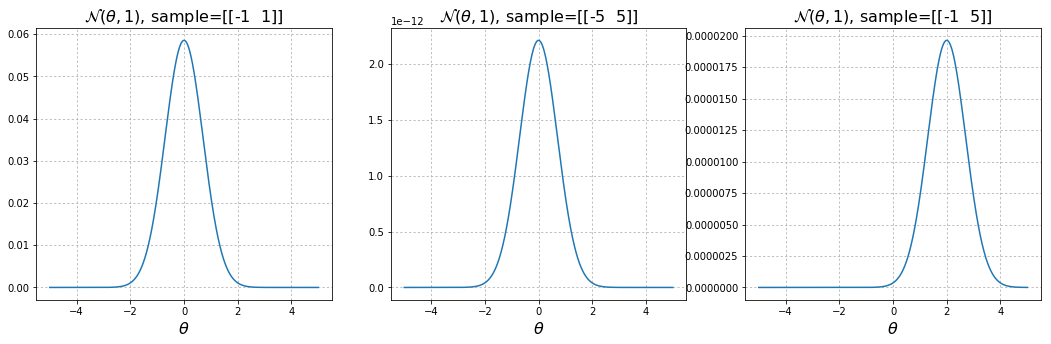

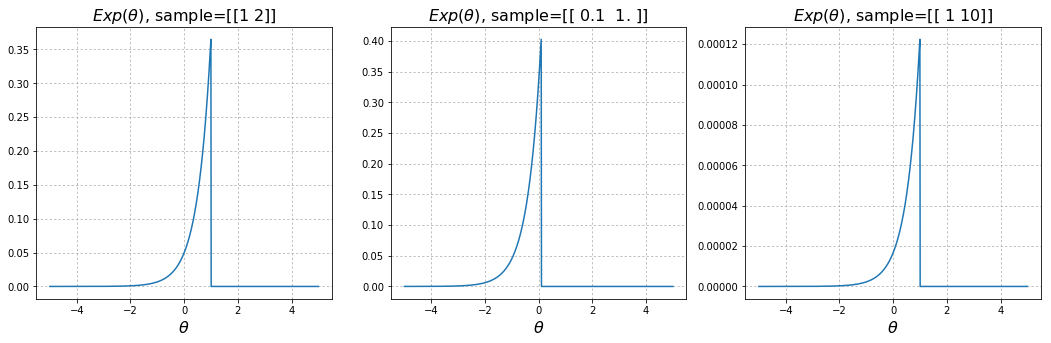

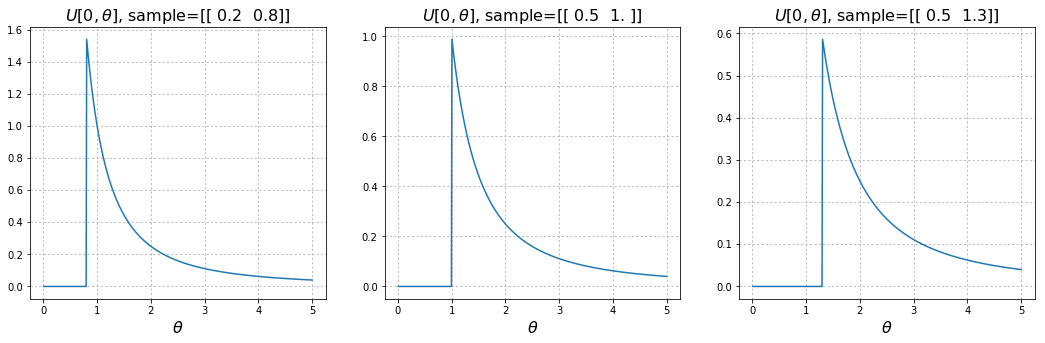

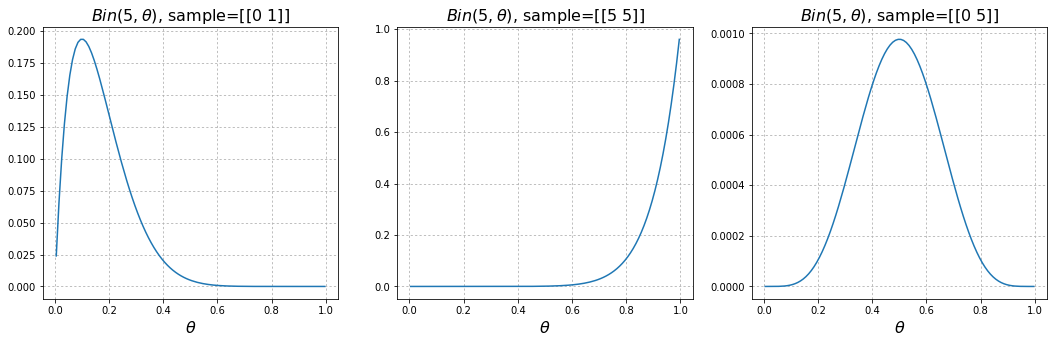

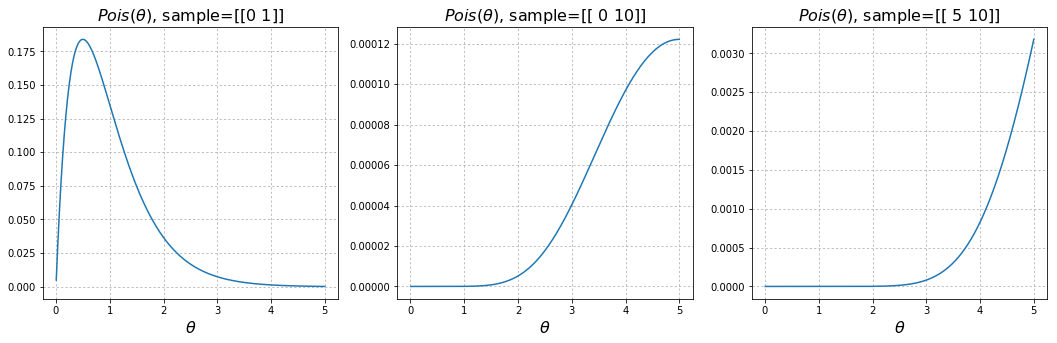

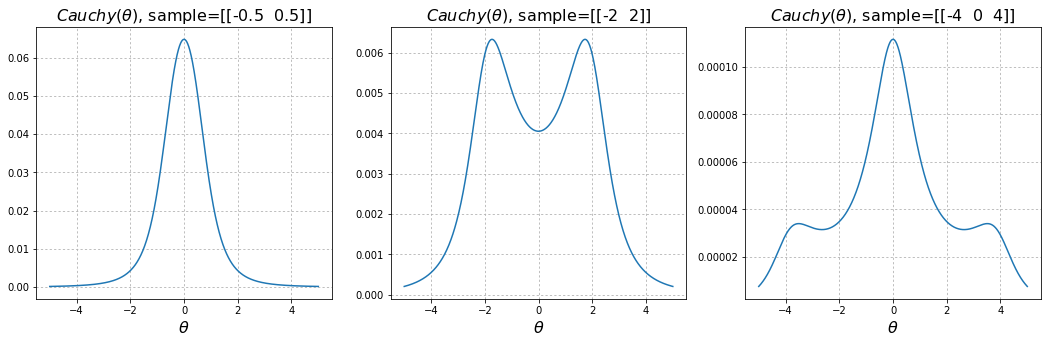

In [12]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')
draw_likelihood(sps.expon(loc=grid).pdf, grid, [[1, 2], [0.1, 1], [1, 10]], '$Exp(\\theta)$')
draw_likelihood(sps.uniform(scale=grid).pdf, grid, [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$U[0, \\theta]$')
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, [[0, 1], [5, 5], [0, 5]], '$Bin(5, \\theta)$')
draw_likelihood(sps.poisson(mu=grid).pmf, grid, [[0, 1], [0, 10], [5, 10]], '$Pois(\\theta)$')
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$Сauchy(\\theta)$')

Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:** ФМП не является плотностью, как минимум интеграл по ней не равен единице.

Почти все выборки состоят их двух наблюдений, обозначим их $X_1$ и $X_2$ (считаем, что $X_1 \le X_2$).  
**ФМП для $\mathcal{N}(\theta, 1)$:**  
Плотность нормального распределения симметрична относительно $\theta$, поэтому ФМП максимальна в точке $\frac{X_1 + X_2}{2}$ и симметрично и монотонно убывает от этой точки. Максимальное значение ФМП тем больше, чем ближе к друг другу находятся $X_1$ и $X_2$.

**ФМП для $Exp(\theta)$**:  
Плотность экспоненциального распределения равна нулю в точках меньших $\theta$ и максимальна в правой окрестности нуля, поэтому ФМП равна нулю в точках, больших $X_1$ и максимальна в левой окрестности $X_1$. Максимальное значение ФМП тем больше, чем ближе к друг другу находятся $X_1$ и $X_2$.

**ФМП для $U[0, \theta]$**:  
Плотность равномерного распределения равна нулю в точках больших $\theta$ и одинакова в точках $[0, \theta]$, поэтому ФМП равна нулю в точках, меньших $X_2$ и максимальна в точке $X_2$. Максимальное значение ФМП тем больше, чем меньше значение $X_2$. Вообще говоря ФМП никак не зависит от значения $X_1$ (мы считаем, что $X_1 \le X_2$).


**ФМП для $Bin(5, \theta)$**:  
Плотность биномиального распределения симметрична относительно $\theta$, поэтому ФМП максимальна в точке $\frac{X_1 + X_2}{2}$ и монотонно убывает от этой точки. Максимальное значение ФМП тем больше, чем ближе к друг другу находятся $X_1$ и $X_2$.

**ФМП для $Pois(\theta)$**:  
Плотность пуассоновского распределения симметрична относительно $\theta$, поэтому ФМП максимальна в точке $\frac{X_1 + X_2}{2}$ и монотонно убывает от этой точки. Максимальное значение ФМП тем больше, чем ближе к друг другу находятся $X_1$ и $X_2$.

**ФМП для $Сauchy(\theta)$**:  
Если наблюдения находятся близко, то ФМП максимально в точке $\frac{X_1 + X_2}{2}$, если далеко, то ФМП имеет два максимума --- примерно в точках $X_1$ и $X_2$. В случаи трёх наблюдений ФМП имеет три локальных максимумы, по одному примерно возле каждого наблюдения.

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже

In [13]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчтета оценки максимального правдоподобия? Реализуйте это. *Подсказка:* нужно использовать некоторую функцию у класса, который реализует это распределения.

Потому что значение плотности стандартного нормального распределения на всех числах меньше 0.4, поэтому произведение плотностей выборки из $10^5$ элементов будет очень маленьким. Исправить это можно, используя не ФМП, а логарифмическую ФМП:

In [14]:
sample = sps.norm.rvs(size=10**5)
loglikelihood = sps.norm.logpdf(sample).sum()
print(loglikelihood)

-141832.392708


**Задача 6.** 
На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Регистрируются координаты $X_i, i=1,...,n$ точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости.
Известно, что $X_i$ имеет распределение Коши.

*a).* На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

*b).* Сгенерируйте выборку размера 100 из стандартного распределения Коши. Для всех $n \leqslant 100$ по первым $n$ элементам выборки посчитайте значения $\overline{X}$ и $\widehat{\mu}$ (выборочное среднее и выборочная медиана). На одном графике изобразите зависимость значений этих оценок от $n$. Сделайте вывод.

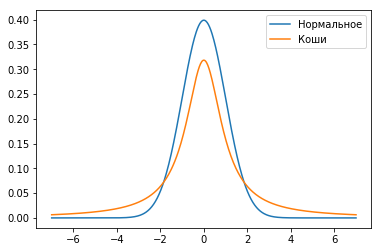

In [15]:
grid = np.linspace(-7, 7, 500)
plt.plot(grid, sps.norm.pdf(grid), label='Нормальное')
plt.plot(grid, sps.cauchy.pdf(grid), label='Коши')
plt.legend()
plt.show()

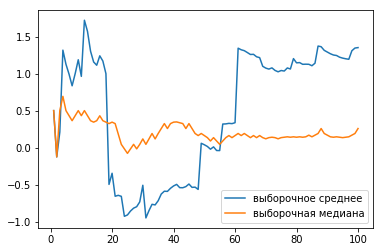

In [16]:
number_elements_in_sample = 100
sample = sps.cauchy.rvs(size=number_elements_in_sample)
averages = [sample[:n].mean() for n in range(1, number_elements_in_sample + 1)]
medians = [np.median(sample[:n]) for n in range(1, number_elements_in_sample + 1)]
xs = np.arange(1, number_elements_in_sample + 1)
plt.plot(xs, averages, label='выборочное среднее')
plt.plot(xs, medians, label='выборочная медиана')
plt.legend()
plt.show()

**Вывод:** Как известно распределение Коши не имеет математического ожидания. Это связано с тем, что плотность распределения Коши не так быстро убывает (по сравнению, например с плотностью нормального распределения). Поэтому в выборке будут постоянно встречаться очень большие по модулю значения, значительно отклоняющие среднее выборки то в отрицательную сторону, то в положительную. Даже при небольшом размере выборки (100 в нашем случае) в ней встречаются наблюдения со значениями порядка ста-пятисот. Они существенно влияют на среднее выборки и на графике возникает огромный скачок. В то же время выборочная медиана без скачков стремится к нулю, что следует из того, что выборочная медиана является асимптотически нормальной оценкой параметра $\theta$ (в нашем случае равен нулю)

**Задача 7.** На сегодняшний день возобновляемые источники энергии становятся все более востребованными. К таким источникам относятся, например, ветрогенераторы. Однако, их мощность очень трудно прогнозировать. В частности, выработка энергии при помощи ветрогенераторов сильно зависит от скорости ветра. Поэтому предсказание скорости ветра является очень важной задачей. Скорость ветра часто моделируют с помощью распределения Вейбулла, которое имеет плотность
$$p_\theta(x) = \frac{kx^{k-1}}{\lambda^k} e^{-(x/\lambda)^k},$$
где $\theta = (k, \lambda)$ --- двумерный параметр. К сожалению, найти точную оценку максимального правдоподобия на $\theta$ не получится. В данном задании нужно найти оценку максимального правдоподобия приближенно с помощью поиска по сетке.

*Выборка.* Создайте выборку по значению скорости ветра для некоторой местности для не менее чем 100 дней. Помочь в этом может <a href="https://www.gismeteo.ru/diary/">дневник погоды</a>. Однако, данные там округлены до целого, поэтому вы можете попробовать найти другие данные.

*a).* Найдите оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ с точностью $10^{-5}$ при помощи поиска по двумерной сетке.

За распределение Вейбулла отвечает класс `weibull_min` из `scipy.stats`, которое задается так: `weibull_min(c=`$k$ `, scale=`$\lambda$ `)`.

Двумерную сетку можно создать с помощью `numpy.mgrid[from:to:step, from:to:step]`. Если попробовать сразу создать сетку с шагом $10^{-5},$ то может не хватить памяти. Поэтому найдите сначала максимум по сетке с большим шагом, а потом сделайте сетку с маленьким шагом в окрестности найденной точки. При вычислении без циклов, возможно, придется создавать четырехмерные объекты.

Функция `numpy.argmax` выдает не очень информативный индекс, поэтому пользуйтесь следующей функцией.

In [17]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

In [18]:
# находит ОМП по сетке
def best_likelihood(grid, sample):
    # плотности распределения Вейбулла в точках grid
    logpdf = sps.weibull_min(c=grid[0], scale=grid[1]).logpdf
    # функции правдоподобия в точках grid
    logpdfs = logpdf(sample[:, np.newaxis, np.newaxis])
    likelihood = logpdfs.sum(axis=0)
    # индекс сетки, в котором функция правдоподобия максимальна
    argmax = cool_argmax(likelihood)
    # (k, λ)
    return grid[0][argmax], grid[1][argmax]


# Среднесуточная скорость ветра за 2012 год
# http://www.atlas-yakutia.ru/weather/wind/climate_russia-III_wind.html
lines = open('7.txt', 'r').readlines()
sample = np.array(list(map(float, lines)))

# начальная сетка --- [1..100, 1..100] с шагом 1
from_k, to_k = 1, 100
from_λ, to_λ = 1, 100
# объявляем переменые вне цикла, чтобы после цикла они сохранились
k, λ = 0, 0
# меняем шаг сетки с 1 до 1e-6
for step in np.logspace(0, -6, 7):
    k, λ = best_likelihood(np.mgrid[from_k:to_k:step, from_λ:to_λ:step], sample)

    print('step:           {}'.format(step))
    print('grid, k:        {:.10g} .. {:.10g}'.format(from_k, to_k))
    print('grid, λ:        {:.10g} .. {:.10g}'.format(from_λ, to_λ))
    print('k:              {:.10g}'.format(k))
    print('λ:              {:.10g}'.format(λ))
    print()

    # строим новую сетку меньшего размера (с меньшим шагом)
    from_k = max(0.1, k - (step * 10))
    to_k = k + (step * 10)
    from_λ = max(0.1, λ - (step * 10))
    to_λ = λ + (step * 10)

step:           1.0
grid, k:        1 .. 100
grid, λ:        1 .. 100
k:              2
λ:              3

step:           0.1
grid, k:        0.1 .. 12
grid, λ:        0.1 .. 13
k:              2.1
λ:              2.7

step:           0.01
grid, k:        1.1 .. 3.1
grid, λ:        1.7 .. 3.7
k:              2.05
λ:              2.7

step:           0.001
grid, k:        1.95 .. 2.15
grid, λ:        2.6 .. 2.8
k:              2.053
λ:              2.702

step:           0.0001
grid, k:        2.043 .. 2.063
grid, λ:        2.692 .. 2.712
k:              2.0535
λ:              2.7022

step:           1e-05
grid, k:        2.0525 .. 2.0545
grid, λ:        2.7012 .. 2.7032
k:              2.05351
λ:              2.70221

step:           1e-06
grid, k:        2.05341 .. 2.05361
grid, λ:        2.70211 .. 2.70231
k:              2.053512
λ:              2.702215



Итак с помощью поиска по сетке получаем оценку максимального правдоподобия параметра $\theta = (k, \lambda)$ равную (2.053512, 2.702215).

Нарисуйте график плотности с параметрами, соответствующим найденным ОМП, а так же нанесите на график гистограмму.

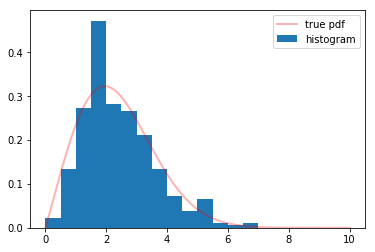

In [19]:
grid = np.linspace(0, 10, 500)
# гистограмма
plt.hist(sample, 20, range=(grid.min(), grid.max()), normed=True, label='histogram')
# истинная плотность
plt.plot(grid, sps.weibull_min(c=k, scale=λ).pdf(grid), color='red', linewidth=2, alpha=0.3, label='true pdf')

plt.legend()
plt.show()

*b).*<font size="5" color="red">\*</font> На самом деле, при помощи дифференцирования можно перейти к задаче поиска ОМП для параметра $k$. Выполните такое преобразование и найдите ОМП приближенно с помощью метода Ньютона, основываясь на параграфе 35 книги А.А. Боровкова "Математическая статистика", 2007.

**Задача 8.** 

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим оценки $2\overline{X}, (n+1)X_{(1)}, X_{(1)}+X_{(n)}, \frac{n+1}{n} X_{(n)}$. Вам необходимо сравнить эти оценки в равномерном подходе с квадратичной и линейной функциями потерь, построив графики функций риска при помощи моделирования.

Для каждого $\theta \in (0, 2]$ с шагом 0.01 сгенерируйте 2000 выборок $X_1^j, ..., X_{100}^j$ из распределения $U[0, \theta]$. По каждой из этих выборок посчитайте значение всех четырех оценок. Тем самым для данного $\theta$ и оценки $\theta^*$ получится 2000 реализаций этой оценки $\theta^*_1, ..., \theta^*_{2000}$, где значение $\theta^*_j$ посчитано по реализации выборки $X_1^j, ..., X_{100}^j$. Теперь можно оценить функцию потерь этой оценки с помощью усреднения
$$\widehat{R}\left(\theta^*, \theta\right) = \frac{1}{2000}\sum\limits_{j=1}^{2000} g\left(\theta^*_j, \theta\right),$$
где $g(x, y)=(x-y)^2$ и $g(x, y)=\left|x-y\right|$.

Нанесите на один график все четыре функции риска. Для каждого типа функции потерь должен быть свой график. Пользуйтесь следующим шаблоном. Ограничение сверху по оси *y* ставьте таким, чтобы графики функции риска с малыми значениями четко различались.

In [20]:
number_samples = 2000
number_elements_in_samples = 100


def loss_function_quadratic(estimate_realisations, tetta):
    return ((estimate_realisations - tetta) ** 2).mean()


def loss_function_absolute(estimate_realisations, tetta):
    return np.abs(estimate_realisations - tetta).mean()


# (loss_function, label)
loss_functions = [(loss_function_quadratic, '$g(x, y) = (x - y)^2$'),
                  (loss_function_absolute, '$g(x, y) = |x - y|$')]


def get_risk(tetta, distribution, estimator, loss_function):
    """
    возвращает значение функции риска, 
    полученное усреднением значений функции потерь (loss_function) 
    на реализациях оценки (получаются с помощью estimator) на 2000 выборках, 
    сгенерированных из распределения distribution
    """

    samples = distribution.rvs(size=(number_samples, number_elements_in_samples))
    estimate_realisations = estimator(samples)
    loss = loss_function(estimate_realisations, tetta)
    return loss


def draw_risk(grid_for_tetta, estimators, distribution_creator):
    for loss_function, loss_function_label in loss_functions:
        ymax = 100
        for estimator, estimator_label in estimators:
            risks = [get_risk(tetta, distribution_creator(tetta), estimator, loss_function) for tetta in grid_for_tetta]
            plt.plot(grid_for_tetta, risks, label=estimator_label)
            ymax = min(ymax, max(risks))
        plt.grid(ls=':')
        plt.xlabel('$\\theta$', fontsize=16)
        plt.ylabel('$\\widehat{R}\\left(\\theta^*, \\theta\\right)$', fontsize=16)
        plt.legend(fontsize=14)
        plt.title(loss_function_label, fontsize=16)
        plt.ylim((0, ymax * 10))
        plt.show()

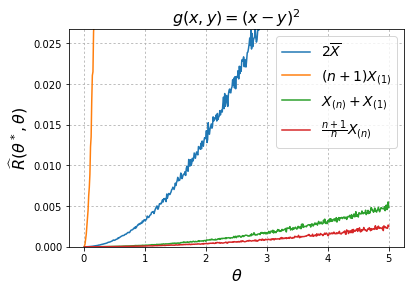

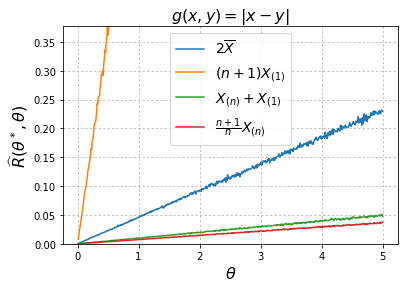

In [21]:
def uniform_estimator1(samples):
    return samples.mean(axis=1) * 2

def uniform_estimator2(samples):
    n = samples.shape[1]
    return samples.min(axis=1) * (n + 1)

def uniform_estimator3(samples):
    return samples.min(axis=1) + samples.max(axis=1)

def uniform_estimator4(samples):
    n = samples.shape[1]
    return samples.max(axis=1) * (n + 1) / n

# (estimator, label)
uniform_estimators = [(uniform_estimator1, '$2\\overline{X}$'),
                      (uniform_estimator2, '$(n+1)X_{(1)}$'),
                      (uniform_estimator3, '$X_{(n)} + X_{(1)}$'),
                      (uniform_estimator4, '$\\frac{n+1}{n}X_{(n)}$')]
grid_for_tetta = np.arange(0.01, 5 + 0.01, 0.01)
draw_risk(grid_for_tetta, uniform_estimators, lambda tetta: sps.uniform(scale=tetta))

Сделайте вывод о том, какая оценка лучше и в каком подходе.

**Вывод:** Получилось, что в обоих подходах оценка $\frac{n+1}{n}X_{(n)}$ лучше оценки $X_{(n)} + X_{(1)}$ лучше оценки $2\overline{X}$ лучше оценки $(n+1)X_{(1)}$.

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $Exp(\theta)$. Для $1 \leqslant k \leqslant 5$ рассмотрим оценки $\left(k! / \overline{X^k}\right)^{1/k}$, которые вы получили в домашнем задании. Проведите исследование, аналогичное пункту *a)*. Используйте цикл по $k$, чтобы не размножать код. Факториалы есть гамма-функция, которая реализована в `scipy.special.gamma`.

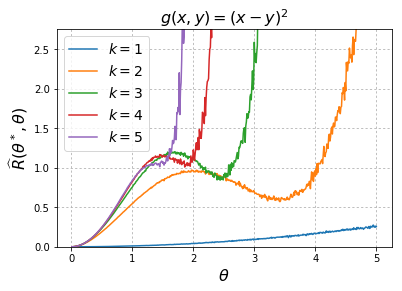

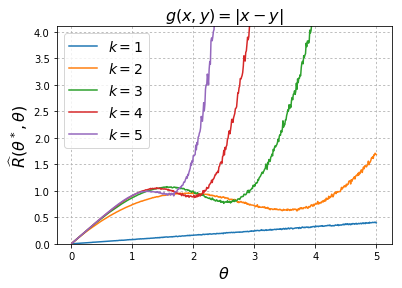

In [22]:
def create_exponential_estimator(k):
    k_factorial = scipy.special.gamma(k)

    def exponential_estimator(samples):
        return (k_factorial / (samples ** k).mean(axis=1)) ** 1 / k

    return exponential_estimator

exponential_estimators = [(create_exponential_estimator(k), '$k = {}$'.format(k)) for k in range(1, 5 + 1)]
grid_for_tetta = np.arange(0.01, 5 + 0.01, 0.01)
draw_risk(grid_for_tetta, exponential_estimators, lambda tetta: sps.expon(scale=1 / tetta))

**Вывод:** В обоих подходах получилось, что оценка с $k=1$ лучше всех остальных. В среднеквадратичном подходе получилось, что оценка с $k=2$ лучше оценок с $k=4$ и $k=5$. Другие пары оценок несравнимы.

**Задача 9<font size="5" color="red">\*</font>.** Пусть $\theta^*$ --- оценка параметра $\theta$ и $R\left(\theta^*, \theta\right) = \mathsf{E}_{\theta} \left(\theta^* - \theta\right)^2$ --- функция риска с квадратичной функцией потерь. Тогда справедливо bias-variance разложение
$$R\left(\theta^*, \theta\right) = bias^2(\theta^*, \theta) + variance(\theta^*, \theta) ,$$
$$bias(\theta^*, \theta) = \mathsf{E}_{\theta} \theta^* - \theta,$$
$$variance(\theta^*, \theta) = \mathsf{D}_{\theta} \theta^*.$$

*a).* Пусть $X_1, ..., X_n$ --- выборка из распределения $U[0, \theta]$. Рассмотрим класс оценок $\mathscr{K} = \left\{cX_{(n)}, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок.

...

Заметим, что каждая компонента bias-variance разложения пропорциональна $\theta^2$. Это означает, достаточно рассмотреть поведение компонент при изменении $c$ только для одного значения $\theta$.

Постройте график зависимости компонент bias-variance разложения от $c$ для $n=5$ и $\theta=1$. С помощью функций `plt.xlim` и `plt.ylim` настройте видимую область графика так, чтобы четко была отобажена информативная часть графика (по оси *x* примерно от 0.9 до 1.3). Не забудьте добавить сетку и легенду, а так же подписать оси.

Сделайте выводы. Какая $c$ дает минимум функции риска? Является ли соответствующая оценка смещеной? Что можно сказать про несмещенную оценку?

*b).* Пусть $X_1, ..., X_n$ --- выборка из распределения $\mathcal{N}(0, \sigma^2)$. Рассмотрим класс оценок $\mathscr{K} = \left\{\frac{1}{c}\sum\limits_{i=1}^n \left(X_i - \overline{X}\right)^2, c\in\mathbb{R}\right\}$. Выпишите bias-variance разложение для таких оценок. Можно использовать то, что величина $\frac{nS^2}{\sigma^2}$ имеет распределение хи-квадрат с $n-1$ степенью свободы (это будет доказано в нашем курсе позже) и ее дисперсия равна $2(n-1)$.

...

Повторите исследование, аналогичное пункту *a)* для $sigma^2 = 1$ и $n \in \{5, 10\}$. Для экономии места нарисуйте два графика в строчку. Не забудьте сделать выводы.

**Задача 10<font size="5" color="red">\*</font>.** Разберитесь с теорией параграфа 4 главы 6 книжки М.Б. Лагутина "Наглядная математическая статистика", 2009. Проведите соответствующее исследование.